<a href="https://colab.research.google.com/github/Samruddhitatiwar/Closest-Pair-Problem/blob/main/blink_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe opencv-python 

In [8]:
cv2.__version__

'4.7.0'

In [3]:
import mediapipe as mp
import cv2
import numpy as np
import uuid 
import os
import math

69 78


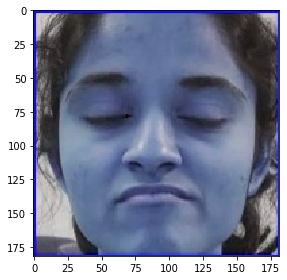

In [36]:
import cv2
import mediapipe as mp
image = cv2.imread("/content/drive/MyDrive/New_folder/truth/face3.jpg")
# newsize=(144,144)  
# image=image.resize(newsize)
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Facial landmarks
result = face_mesh.process(rgb_image)


right_eyes1 = [159, 145, 133, 33] 
left_eyes1 = [386, 374, 362, 263]
# features = left_eyes1 + right_eyes1
features=[133]
height, width, _ = image.shape
for facial_landmarks in result.multi_face_landmarks:
    for i in features:
        pt1 = facial_landmarks.landmark[i]
        x = int(pt1.x * width)
        y = int(pt1.y * height)
        print(x,y)
        cv2.circle(image, (x, y), 1, (10, 10, 0), -1)
        

# print(height,width,_)

import skimage.io as imageio
imageio.imshow(image);

In [4]:
  import skimage.io as imageio

In [ ]:
#blink rate
180 frames - aspect ratio- scatter plot

eyes-


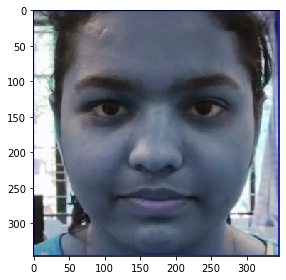

In [8]:
#function that will take calculate the aspect ratio and store in a list
#global variables 
left_eye_ratio=[]
right_eye_ratio=[]

def eye_aspect_ratio(path,number):
  right_eyes1 = [159, 145, 133, 33] 
  left_eyes1 = [386, 374, 362, 263]
  # features = left_eyes1 + right_eyes1
  features=[159]
  for i in range(0,number+1):#loop to traverse images
    image = cv2.imread(path+str(i)+'.jpg')
    imageio.imshow(image)
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh()
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = face_mesh.process(rgb_image)
    height, width, _ = image.shape
    for facial_landmarks in result.multi_face_landmarks:
          pt1 = facial_landmarks.landmark[159]
          x1 = int(pt1.x * width)
          y1 = int(pt1.y * height)
          # print(x1,y1)
          cv2.circle(image, (x1, y1), 1, (10, 10, 0), -1)
          pt2 = facial_landmarks.landmark[145]
          x2 = int(pt2.x * width)
          y2 = int(pt2.y * height)
          # print(x2,y2)
          cv2.circle(image, (x2, y2), 1, (10, 10, 0), -1)
          pt3 = facial_landmarks.landmark[33]
          x3 = int(pt3.x * width)
          y3 = int(pt3.y * height)
          # print(x2,y2)
          cv2.circle(image, (x3, y3), 1, (10, 10, 0), -1)
          pt4 = facial_landmarks.landmark[133]
          x4 = int(pt4.x * width)
          y4 = int(pt4.y * height)
          # print(x2,y2)
          cv2.circle(image, (x4, y4), 1, (10, 10, 0), -1)
          left_eye_ratio.append(math.dist([x1,y1],[x2,y2])/math.dist([x3,y3],[x4,y4]))
          
    

eye_aspect_ratio('/content/drive/MyDrive/New_folder/truth/face',100)

In [9]:
left_eye_ratio

[0.30307494025528614,
 0.3071475584169756,
 0.3016786185682056,
 0.07980868844676223,
 0.3343180720616743,
 0.3535533905932738,
 0.3017914294914588,
 0.3624997167972069,
 0.3167744004196767,
 0.2906673951891385,
 0.2630668208823282,
 0.2643788829911086,
 0.32420593617497945,
 0.3157894736842105,
 0.14276612204964995,
 0.3419868671470267,
 0.32420593617497945,
 0.3419868671470267,
 0.3028912664076913,
 0.32420593617497945,
 0.32532970362140945,
 0.2971887748270645,
 0.2643788829911086,
 0.2702702702702703,
 0.2984143007473183,
 0.3333333333333333,
 0.2894736842105263,
 0.3048553804248462,
 0.32432432432432434,
 0.32420593617497945,
 0.32420593617497945,
 0.32385154809000277,
 0.24368508941428968,
 0.3609718741245927,
 0.35122309752289443,
 0.32420593617497945,
 0.32532970362140945,
 0.316227766016838,
 0.32432432432432434,
 0.3343597663503992,
 0.2984143007473183,
 0.32385154809000277,
 0.24123593087845216,
 0.2971887748270645,
 0.3328201177351375,
 0.305085107923876,
 0.388738941364946

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

left_eye=pd.DataFrame(left_eye_ratio,columns=["lr"])




In [31]:
left_eye

,lr
0,0.303075
1,0.307148
2,0.301679
3,0.079809
4,0.334318
...,...
96,0.336635
97,0.319360
98,0.319360
99,0.302111


In [32]:
index=list(range(0,101))
left_eye["index"]=index

In [33]:
left_eye

,lr,index
0,0.303075,0
1,0.307148,1
2,0.301679,2
3,0.079809,3
4,0.334318,4
...,...,...
96,0.336635,96
97,0.319360,97
98,0.319360,98
99,0.302111,99


<Axes: xlabel='index', ylabel='lr'>

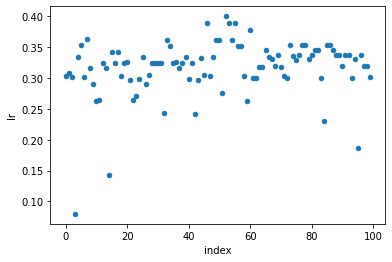

In [37]:
left_eye[0:100].plot.scatter(x='index',y='lr')
#100 frames=3 secs approx as fps=30
#60 secs=22blinks
#3secs=1 blink